## overview

In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random
from urllib.request import urlretrieve

In [9]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
import seaborn as sns
import imageio
# torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.ERROR)

In [6]:
# graph setting
sns.set()

In [7]:
# gpu
torch.cuda.is_available()

True

In [8]:
# global parameter
DATA_DIR="../dlwpt-code/data/"

## 画像

In [11]:
img_arr=imageio.imread(DATA_DIR+"p1ch4/image-dog/bobby.jpg")

In [13]:
img_arr.shape

(720, 1280, 3)

In [14]:
img=torch.from_numpy(img_arr) #c*h*w

In [15]:
out=img.permute(2,0,1) #imgとストレージは共有

## 3次元データ

In [17]:
dir_path = DATA_DIR+"p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 32/99  (32.365/99  (65.799/99  (100.0%)


(99, 512, 512)

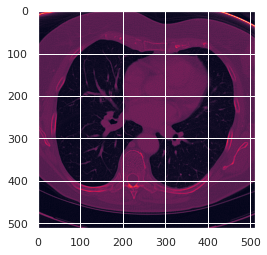

In [18]:
plt.imshow(vol_arr[50]);

In [19]:
vol=torch.from_numpy(vol_arr).float()
vol=torch.unsqueeze(vol,0)

## table data

In [21]:
wine_path = DATA_DIR+"p1ch4/tabular-wine/winequality-white.csv"

In [25]:
df=pd.read_csv(wine_path,delimiter=";")

In [26]:
wineq=torch.from_numpy(df.values)

In [29]:
target=wineq[:,-1].long()

In [30]:
target_onehot=torch.zeros(target.shape[0],10)
target_onehot.scatter_(1,target.unsqueeze(1),1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

## 演習問題

In [35]:
vol.mean(-3).shape

torch.Size([1, 512, 512])